In [1]:
from sunpy.net.helioviewer import HelioviewerClient
import matplotlib.pyplot as plt
from matplotlib.image import imread
hv = HelioviewerClient()
file = hv.download_png('2099/01/01', 4.8, "[SDO,HMI,AIA,171,1,100]", x0=0, y0=0, width=512, height=512)
im = imread(file)
plt.imshow(im)
plt.axis('off')
plt.show()

C:\Users\Akared\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


IOError: cannot identify image file 'C:\\Users\\Akared\\sunpy\\data\\file.0'

In [24]:
from astropy.io import fits

In [30]:
fits_file = fits.open('F:/Research/Downloads/aia_20101206_000000_0171_image_lev1.fits')
fits_file.info()

Filename: F:/Research/Downloads/aia_20101206_000000_0171_image_lev1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                CompImageHDU    193   (4096, 4096)   int16   


In [26]:
image_data = fits_file[1].data
fits_file.close()

Exception AttributeError: AttributeError('_coldefs',) in <bound method FITS_rec.__del__ of FITS_rec([(array([1974,    0]),), (array([1967, 1974]),),
       (array([1973, 3941]),), ..., (array([    2040, 12259876]),),
       (array([    2046, 12261916]),), (array([    2072, 12263962]),)], 
      dtype=(numpy.record, [('COMPRESSED_DATA', '>i4', (2,))]))> ignored


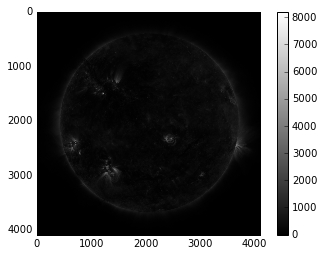

In [28]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [5]:
import sunpy.map
import matplotlib.pyplot as plt

%matplotlib inline
aia = sunpy.map.Map('F:/Research/Downloads/aia_20101206_000000_0171_image_lev1.fits')   


Exception AttributeError: AttributeError('_coldefs',) in <bound method FITS_rec.__del__ of FITS_rec([(array([1974,    0]),), (array([1967, 1974]),),
       (array([1973, 3941]),), ..., (array([    2040, 12259876]),),
       (array([    2046, 12261916]),), (array([    2072, 12263962]),)], 
      dtype=(numpy.record, [('COMPRESSED_DATA', '>i4', (2,))]))> ignored


TypeError: ufunc 'multiply' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

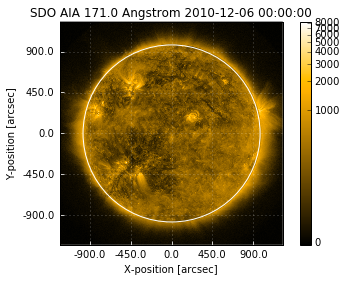

In [6]:
aia.plot()   
plt.colorbar()  
aia.draw_limb()   
from astropy import units as u
aia.draw_grid(grid_spacing=15*u.deg)  

In [1]:
import sunpy
sunpy.config.set('downloads', 'download_dir', 'F:/Research/Downloads')
sunpy.config.set('downloads', 'sample_dir', 'F:/Research/Downloads')

In [2]:
sunpy.print_config()  

FILES USED:
  C:\Users\Akared\Anaconda\lib\site-packages\sunpy-0.6.1-py2.7.egg\sunpy\data\sunpyrc

CONFIGURATION:
  [general]
  time_format = %Y-%m-%d %H:%M:%S
  working_dir = C:\Users\Akared\sunpy

  [downloads]
  download_dir = F:/Research/Downloads
  sample_dir = F:/Research/Downloads

  [database]
  url = sqlite:///C:\Users\Akared\sunpy/sunpydb.sqlite



In [5]:
# import sunpy.data
# sunpy.data.download_sample_data(overwrite=False)

In [12]:
from sunpy.net import vso
client=vso.VSOClient()

In [18]:
qr = client.query(vso.attrs.Time('2016/1/1', '2016/1/2'), vso.attrs.Instrument('sd0'))

In [22]:
# qr=client.query_legacy(tstart='2016/01/01', tend='2016/01/02', instrument='SDO', min_wave='171', max_wave='171', unit_wave='Angstrom')

In [21]:
qr

<Table length=0>
Start Time End Time  Source Instrument   Type 
 float64   float64  float64  float64   float64
---------- -------- ------- ---------- -------

In [23]:
# res=client.get(qr, path='F:/Research/Downloads/vso_test.fits').wait()
# # downloading requires a bit of time. So it would appear that the line finished running
# # if the * disappears. This will become a problem if we are to use the downloaded data.
# # It is best to use .wait() so that it will not run in parallel with the code.

In [4]:
from sunpy.net import vso, hek2vso, hek
client=vso.VSOClient()
h2v = hek2vso.H2VClient()

In [9]:
# tstart = '2011/08/09 07:23:56'
# tend = '2011/08/09 12:40:29'
# event_type = 'FL'
# result = client.query(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))

In [10]:
# result_test = client.query(hek.attrs.Time(tstart,tend),
#                       hek.attrs.EventType(event_type)
#                      )
# vso_records = h2v.translate_and_query(result_test[10])
# len(vso_records[0])

In [16]:
import matplotlib.pyplot as plt 
import sunpy 
from sunpy.net import vso
from astropy import units as u

client = vso.VSOClient()

result = client.query(
    vso.attrs.Time((2013, 6, 1, 8, 30, 0),
                   (2013, 6, 1, 8, 35, 0)),
    vso.attrs.Instrument('aia'),
    vso.attrs.Wave(304*u.AA,304*u.AA))

print "Number of records found: %d " % result.num_records() 
res = client.get(result, path="F:/Research/Downloads/AIA/{file}").wait()

cube = sunpy.Map(res, cube=True)
ani = cube.plot(controls=False)

Number of records found: 25 


AttributeError: 'module' object has no attribute 'Map'